# PCA  Churn Prediction- Bank Data

**_Importing The Required Libraries & Packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(15,10)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**_Changing The Default Working Directory & Path and Reading The Dataset Using Pandas Command_**

In [2]:
os.chdir('D:\\bala\\study things\\data science\\Batch 74 Day 19\\Batch 74 Day 19\\')
df = pd.read_csv('Bank Data Dimension Reduction.csv')
df.head()

,Index,Interest,Credit,Gender,Previous,Duration,Churn
0,0,17546.0,1,0.0,0.0,48.0,NO
1,1,30085.1,3,1.0,1.0,40.0,YES
2,2,16575.4,0,0.0,1.0,51.0,YES
3,3,20375.4,3,0.0,0.0,23.0,YES
4,4,50576.3,0,0.0,0.0,57.0,NO


## Data Cleaning
**_Checking the Null values of all the Columns in the dataset_**

In [3]:
df.isnull().sum()

Index        0
Interest    68
Credit       0
Gender      21
Previous     7
Duration    70
Churn        0
dtype: int64

**_Checking the value counts for Gender columns_**

In [4]:
df.Gender.value_counts()

0.0    290
1.0    289
Name: Gender, dtype: int64

**_Filling The null Values of the <span style="color:red">Gender</span> column with the most frequent value_**

In [5]:
df['Gender']=df['Gender'].fillna(0)

**_Checking the value counts for Gender columns after updating it_**

In [6]:
df.Gender.value_counts()

0.0    311
1.0    289
Name: Gender, dtype: int64

**_Checking the value counts for Previous columns_**

In [7]:
df['Previous'].value_counts()

0.0    302
1.0    291
Name: Previous, dtype: int64

**_Checking the value counts for <span style="color:red">Previous</span> columns after updating it_**

In [8]:
df['Previous']=df['Previous'].fillna(0)

**_Checking the value counts for Previous columns after updating it_**

In [9]:
df['Previous'].value_counts()

0.0    309
1.0    291
Name: Previous, dtype: int64

**_Filling the null values of the <span style="color:red">Interest</span> column with mean value of the same column_**

In [10]:
df['Interest'].fillna(df['Interest'].mean(),inplace=True)

**_Filling the null values of the <span style="color:red">Duration</span> column with median value of the same column_**

In [11]:
df['Duration'].fillna(df['Duration'].median(),inplace=True)

**_Label Encoding the <span style="color:red">Churn</span> column._**

In [12]:
df['Churn']=df['Churn'].astype('category')
df['Churn']=df['Churn'].cat.codes

**_Changing the data type of <span style="color:red">Gender</span>,<span style="color:red">Previous</span> column from 'Float' To 'Category'_**

In [13]:
df['Gender']=df['Gender'].astype('category')
df['Previous']=df['Previous'].astype('category')

**_Dropping the column <span style="color:red">Index</span> from the data column which is not required._**

In [14]:
df.drop(['Index'],axis=1,inplace=True)

**_Assigning the dependent and independent variables_**

In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Data Preprocessing
**_Standardizing the independent variable of the dataset_**

In [16]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

**_Processing the independent variable with principal component analysis to get the importance of all the columns in the independent variable_**

In [17]:
pca = PCA()
pca_x = pca.fit_transform(x)

**_Getting the numeric value for the importance of column of the independent variable_**

In [18]:
display(pca.explained_variance_ratio_)

array([0.33943997, 0.20168854, 0.20083191, 0.18998087, 0.06805872])

## Model Fitting
**_Splitting the dependent and independent variable into training and test dataset using train test split._**

In [19]:
pca_x_train,pca_x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.2,random_state=33)

**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [20]:
RF = RandomForestClassifier(random_state=99)
RF.fit(pca_x_train,y_train)
pca_y_pred  = RF.predict(pca_x_test)
print('Accuracy {} %'.format(100*accuracy_score(pca_y_pred,y_test)))
print('\n Classification Report',classification_report(pca_y_pred,y_test))
print('\n Confusion Matrix',confusion_matrix(y_test,pca_y_pred))

Accuracy 67.5 %

 Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.88      0.74      0.81       109

    accuracy                           0.68       120
   macro avg       0.44      0.37      0.40       120
weighted avg       0.80      0.68      0.73       120


 Confusion Matrix [[ 0 28]
 [11 81]]


**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [21]:
LR = LogisticRegression()
LR.fit(pca_x_train,y_train)
pca_y_pred = LR.predict(pca_x_test)
print('Accuracy {}%'.format(100*accuracy_score(pca_y_pred,y_test),'\n'))
print('Classification Report',classification_report(y_test,pca_y_pred),'\n')
print('Confusion Matrix',confusion_matrix(pca_y_pred,y_test))

Accuracy 76.66666666666667%
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120
 

Confusion Matrix [[ 0  0]
 [28 92]]


**_Fitting the Decision Tree Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset_**

In [22]:
DT = DecisionTreeClassifier(random_state=99)
DT.fit(pca_x_train,y_train)
pca_y_pred = DT.predict(pca_x_test)
print('Accuracy {}%'.format(100*accuracy_score(pca_y_pred,y_test),'\n'))
print('Classification Report',classification_report(y_test,pca_y_pred),'\n')
print('Confusion Matrix',confusion_matrix(pca_y_pred,y_test))

Accuracy 58.333333333333336%
Classification Report               precision    recall  f1-score   support

           0       0.18      0.21      0.19        28
           1       0.74      0.70      0.72        92

    accuracy                           0.58       120
   macro avg       0.46      0.45      0.46       120
weighted avg       0.61      0.58      0.60       120
 

Confusion Matrix [[ 6 28]
 [22 64]]


## Dimensional Reduction
**_Processing the independent variable with principal component analysis of 2 components to get the importance of all the columns in the independent variable_**

In [23]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(x)

**_Getting the numeric value for the importance of column of the independent variable after reducing its dimension_**

In [24]:
pca.explained_variance_ratio_

array([0.33943997, 0.20168854])

**_Splitting the dependent and independent variable into training and test dataset using train test split after reducing its dimension of the independent variable_**

In [25]:
pca_x_train,pca_x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.2,random_state=33)

**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [26]:
LR1 = LogisticRegression()
LR1.fit(pca_x_train,y_train)
LR_pred1 = LR1.predict(pca_x_test)
print('Accuracy score {}%'.format(100*accuracy_score(y_test,LR_pred1)))
print('Classification Report',classification_report(y_test,LR_pred1),'\n')
print('Confusion Matrix',confusion_matrix(y_test,LR_pred1))

Accuracy score 76.66666666666667%
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120
 

Confusion Matrix [[ 0 28]
 [ 0 92]]


**_Fitting the Decision Tree Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [27]:
DT = DecisionTreeClassifier(random_state=99)
DT.fit(pca_x_train,y_train)
DT_pred = DT.predict(pca_x_test)
print('Accuracy {}%'.format(100*accuracy_score(DT_pred,y_test),'\n'))
print('Classification Report',classification_report(y_test,DT_pred),'\n')
print('Confusion Matrix',confusion_matrix(DT_pred,y_test))

Accuracy 62.5%
Classification Report               precision    recall  f1-score   support

           0       0.26      0.32      0.29        28
           1       0.78      0.72      0.75        92

    accuracy                           0.62       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.66      0.62      0.64       120
 

Confusion Matrix [[ 9 26]
 [19 66]]


**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [28]:
RF = RandomForestClassifier(random_state=99)
RF.fit(pca_x_train,y_train)
RF_pred  = RF.predict(pca_x_test)
print('Accuracy {} %'.format(100*accuracy_score(RF_pred,y_test)))
print('\n Classification Report',classification_report(RF_pred,y_test))
print('\n Confusion Matrix',confusion_matrix(RF_pred,y_test))

Accuracy 68.33333333333333 %

 Classification Report               precision    recall  f1-score   support

           0       0.21      0.27      0.24        22
           1       0.83      0.78      0.80        98

    accuracy                           0.68       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.71      0.68      0.70       120


 Confusion Matrix [[ 6 16]
 [22 76]]


**_Processing the independent variable with principal component analysis of 4 components to get the importance of all the columns in the independent variable_**

In [29]:
pca = PCA(n_components=4)
pca_x = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.33943997, 0.20168854, 0.20083191, 0.18998087])

**_Getting the numeric value for the importance of column of the independent variable after reducing its dimension_**

In [30]:
pca.explained_variance_ratio_

array([0.33943997, 0.20168854, 0.20083191, 0.18998087])

**_Splitting the dependent and independent variable into training and test dataset using train test split after reducing its dimension of the independent variable_**

In [31]:
pca_x_train,pca_x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.2,random_state=33)

**_Fitting the Logistic Regression Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [32]:
LR1 = LogisticRegression()
LR1.fit(pca_x_train,y_train)
LR_pred1 = LR1.predict(pca_x_test)
print('Accuracy score {}%'.format(100*accuracy_score(y_test,LR_pred1)))
print('Classification Report',classification_report(y_test,LR_pred1),'\n')
print('Confusion Matrix',confusion_matrix(y_test,LR_pred1))

Accuracy score 76.66666666666667%
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.77      1.00      0.87        92

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120
 

Confusion Matrix [[ 0 28]
 [ 0 92]]


**_Fitting the Decision Tree Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [33]:
DT1 = DecisionTreeClassifier(random_state=99)
DT1.fit(pca_x_train,y_train)
DT_pred1 = DT1.predict(pca_x_test)
print('Accuracy {}%'.format(100*accuracy_score(DT_pred1,y_test),'\n'))
print('Classification Report',classification_report(y_test,DT_pred1),'\n')
print('Confusion Matrix',confusion_matrix(DT_pred1,y_test))

Accuracy 56.666666666666664%
Classification Report               precision    recall  f1-score   support

           0       0.07      0.07      0.07        28
           1       0.72      0.72      0.72        92

    accuracy                           0.57       120
   macro avg       0.39      0.39      0.39       120
weighted avg       0.57      0.57      0.57       120
 

Confusion Matrix [[ 2 26]
 [26 66]]


**_Fitting the Random Forest Classifier Model with the dependent train and independent train variable and getting the algorithm,accuracy score,classification report and confusion matrix between the predicted values and dependent test dataset after, reducing the dimensions of the independent variable_**

In [34]:
RF1 = RandomForestClassifier(random_state=99)
RF1.fit(pca_x_train,y_train)
RF_pred1  = RF1.predict(pca_x_test)
print('Accuracy {} %'.format(100*accuracy_score(RF_pred1,y_test)))
print('\n Classification Report',classification_report(RF_pred1,y_test))
print('\n Confusion Matrix',confusion_matrix(RF_pred1,y_test))

Accuracy 65.83333333333333 %

 Classification Report               precision    recall  f1-score   support

           0       0.11      0.16      0.13        19
           1       0.83      0.75      0.79       101

    accuracy                           0.66       120
   macro avg       0.47      0.46      0.46       120
weighted avg       0.71      0.66      0.68       120


 Confusion Matrix [[ 3 16]
 [25 76]]


**_Create the Pickle File of the model with the highest accuracy score with the model name_**

In [35]:
pickle.dump(LR,open('PCA High Acc.pkl','wb'))

## Model Testing
**_Loading the pickle file_**

In [36]:
model = pickle.load(open('PCA High Acc.pkl','rb'))

**_predicting the independent variable using the loaded pickle file and getting the accuracy score,confusion matrix,classifiaction report of the complete data_**

In [37]:
y_pred = model.predict(x)
print('Accuracy {} %'.format(100*accuracy_score(y_pred,y)))
print('\n Classification Report',classification_report(y_pred,y))
print('\n Confusion Matrix',confusion_matrix(y_pred,y))

Accuracy 75.83333333333333 %

 Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86       600

    accuracy                           0.76       600
   macro avg       0.50      0.38      0.43       600
weighted avg       1.00      0.76      0.86       600


 Confusion Matrix [[  0   0]
 [145 455]]


**_Plotting the Line Graph to represent the accuracy between predicted value and actual value and saving the PNG file_**

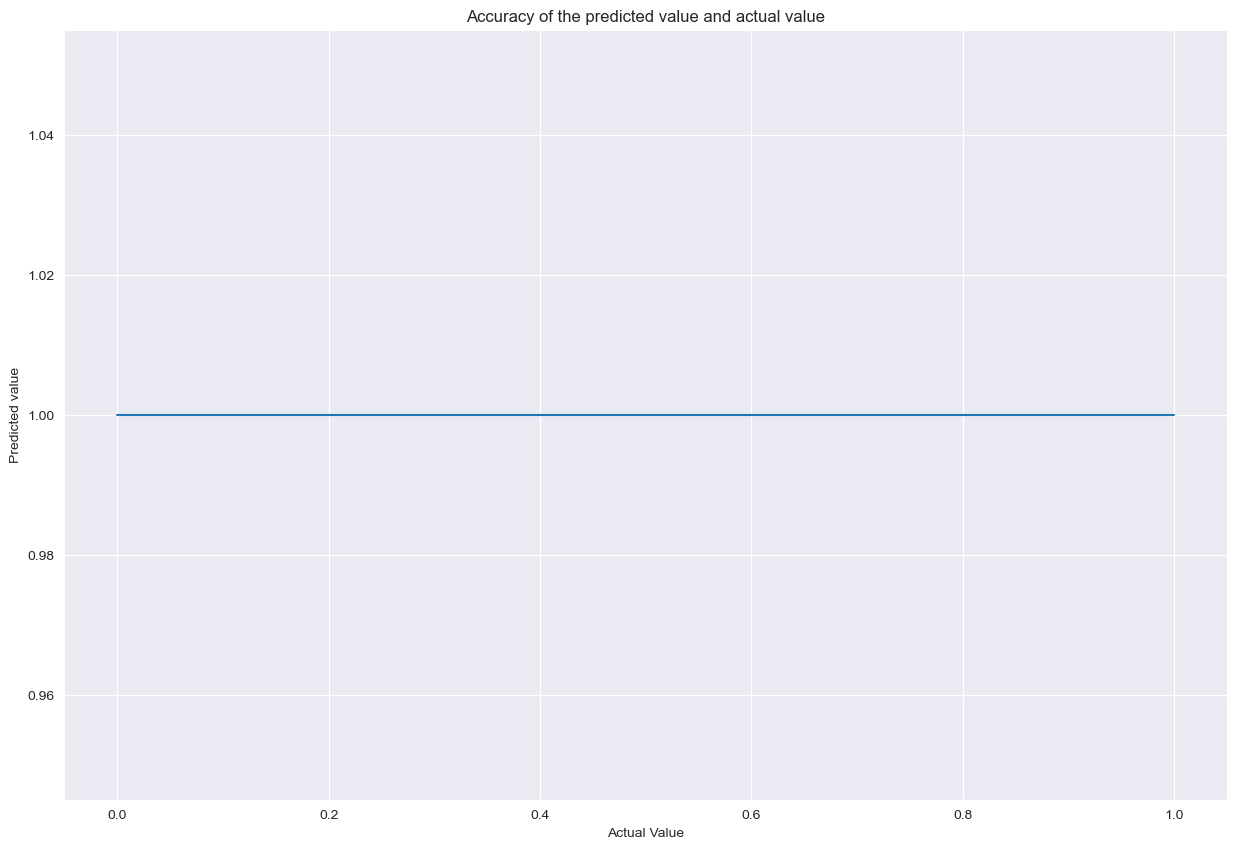

In [38]:
sns.set_style('darkgrid')
plt.plot(y,y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted value')
plt.title('Accuracy of the predicted value and actual value')
plt.savefig('Accuracy of the predicted value and actual value.png')
plt.show()